#Zadanie 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import typing

In [ ]:
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"]="--"

####Celem zadania jest symulacyjne sprawdzenie stwierdzeń dotyczących warunkowej wartości oczekiwanej.

Pierwszym z nich jest stwierdzenie:

Jeśli $X, Y$ są zmiennymi niezależnymi, a $\mathbb{E}(Y) = 0$, to dla $Z = XY + \sin X$ zachodzi $\mathbb{E}(Z|X) = \sin X$.

Jako przykład wybrano zmienne niezależne z rozkładu normalnego $ X, Y \sim \mathcal{N}(0,\,1)$. Następnie skonstruowano zmienną $Z$ i obliczono jej wartość oczekiwaną pod warunkiem $X$. Na wykresie porównano wysymulowane wartości z wartościami estymowanymi oraz teoretycznymi wartości oczekiwanej.

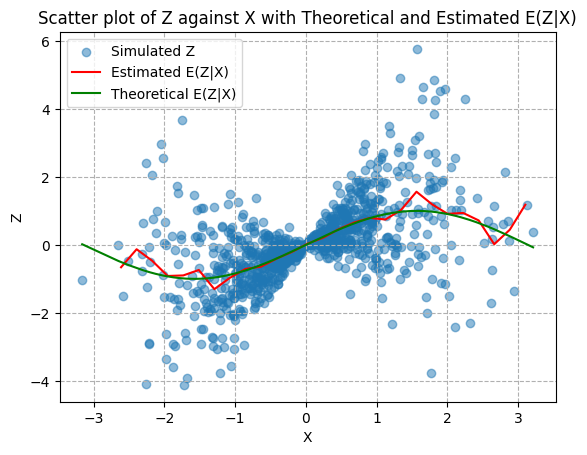

In [8]:
def simulate_independent_variables(n: int =1000) -> typing.Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Simulate independent normal variables X and Y and compute Z = XY + sin(X).

    Parameters:
    n (int): Number of samples to generate.

    Returns:
    tuple of np.ndarray: Arrays of X, Y, and Z.

    Example:
    >>> X, Y, Z = simulate_independent_variables(1000)
    """
    X = np.random.normal(0, 1, n)
    Y = np.random.normal(0, 1, n)
    Z = X * Y + np.sin(X)
    return X, Y, Z

def plot_estimated_vs_theoretical(X: np.ndarray, Z: np.ndarray):
    """
    Create a scatter plot of simulated Z against X and overlay the theoretical and estimated E(Z|X).

    Parameters:
    X (np.ndarray): Array of X values.
    Z (np.ndarray): Array of Z values.

    Example:
    >>> X, Y, Z = simulate_independent_variables(1000)
    >>> plot_estimated_vs_theoretical(X, Z)
    """
    plt.scatter(X, Z, alpha=0.5, label='Simulated Z')

    # Estimation using binning
    bins = np.linspace(np.min(X), np.max(X), 30)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    digitized = np.digitize(X, bins)

    bin_means = []
    for i in range(1, len(bins)):
        bin_values = Z[digitized == i]
        if len(bin_values) > 0:
            bin_means.append(bin_values.mean())
        else:
            bin_means.append(np.nan)  # or handle it in another appropriate way

    bin_means = np.array(bin_means)

    plt.plot(bin_centers, bin_means, label='Estimated E(Z|X)', color='red')
    plt.plot(np.sort(X), np.sin(np.sort(X)), label='Theoretical E(Z|X)', color='green')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.title('Scatter plot of Z against X with Theoretical and Estimated E(Z|X)')
    plt.legend()
    plt.show()

# Example usage
X, Y, Z = simulate_independent_variables()
plot_estimated_vs_theoretical(X, Z)

#### Wnioski:

1. Symulacja zmiennych niezależnych: Funkcja simulate_independent_variables symuluje dwie niezależne zmienne normalne $X$ i $Y$, a następnie oblicza zmienną $Z$ jako $Z = XY + sin(X)$. Dzięki tej funkcji możemy zbadać zależność między $X$ a $Z$, gdzie $Z$ jest funkcją zarówno $X$, jak i $Y$.

2. Wykres teoretyczny vs oszacowany: Wykres pokazuje zależność między $X$ a $Z$, wraz z teoretyczną wartością $E(Z|X)$ (zielona linia) oraz oszacowaną wartością $E(Z|X)$ (czerwona linia) uzyskaną poprzez średnie wartości w poszczególnych binach $X$. Teoretyczna wartość $E(Z|X) = sin(X)$ wynika z założeń, ponieważ $E(Y) = 0$ i zmienne $X$ i $Y$ są niezależne.

3. Dopasowanie oszacowanej wartości: Czerwona linia pokazuje, że oszacowana wartość $E(Z|X)$ dobrze dopasowuje się do teoretycznej wartości, co wskazuje na poprawność symulacji oraz metody estymacji użytej w funkcji plot_estimated_vs_theoretical.


####Przejdźmy do kolejnego stwierdzenia odnoszącego się do procesu Poissona.
Zbadano czy, wartość oczekiwana liczby klientów przybyłych do sklepu w chwili $t$ pod warunkiem, że w chwili $T$ liczba klientów w sklepie wyniosła $N_T$, wynosi $t N_T / T$.

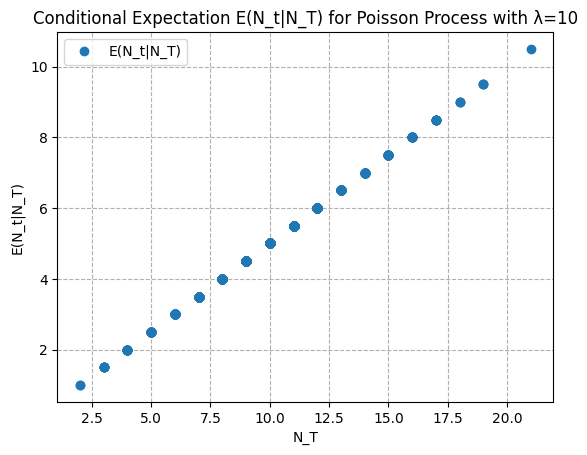

In [9]:
def simulate_poisson_process(lam: float, T: float, num_simulations: int) -> typing.List[np.ndarray]:
    """
    Simulate a Poisson process with intensity lambda up to time T.

    Parameters:
    lam (float): Intensity of the Poisson process.
    T (float): Upper limit of time.
    num_simulations (int): Number of simulations to run.

    Returns:
    list of np.ndarray: List of arrays representing the Poisson process for each simulation.

    Example:
    >>> processes = simulate_poisson_process(10, 1, 5)
    """
    return [np.random.poisson(lam * np.linspace(0, T, int(T * 100))) for _ in range(num_simulations)]

def plot_conditional_expectation(lam: float, T: float, t: float, num_simulations: int):
    """
    Plot the conditional expectation E(N_t|N_T) for a Poisson process.

    Parameters:
    lam (float): Intensity of the Poisson process.
    T (float): Upper limit of time.
    t (float): Time at which to calculate the conditional expectation.
    num_simulations (int): Number of simulations to run.

    Example:
    >>> plot_conditional_expectation(10, 1, 0.5, 5)
    """
    processes = simulate_poisson_process(lam, T, num_simulations)
    NT_values = [process[-1] for process in processes]
    conditional_expectations = [nt * t / T for nt in NT_values]

    plt.plot(NT_values, conditional_expectations, 'o', label=f'E(N_t|N_T)')
    plt.xlabel('N_T')
    plt.ylabel(f'E(N_t|N_T)')
    plt.title(f'Conditional Expectation E(N_t|N_T) for Poisson Process with λ={lam}')
    plt.legend()
    plt.show()

# Example usage
lam = 10
T = 1
t = 0.5
num_simulations = 1000
plot_conditional_expectation(lam, T, t, num_simulations)

#### Wnioski:

1. Symulacja procesu Poissona: Funkcja simulate_poisson_process symuluje proces Poissona o intensywności $λ$ do czasu $T$. Każda symulacja generuje proces Poissona, który jest następnie używany do analizy warunkowej wartości oczekiwanej.

2. Wykres warunkowej wartości oczekiwanej: Wykres przedstawia zależność między wartością procesu Poissona $N_T$ w chwili $T$ a warunkową wartością oczekiwaną $E(N_t|N_T)$ w chwili t. Zależność ta jest liniowa i pokazuje, że warunkowa wartość oczekiwana w chwili $t$ jest proporcjonalna do wartości procesu w chwili $T$, co jest zgodne z teorią procesu Poissona.

3. Potwierdzenie teorii: Wartości na wykresie zgadzają się z teoretycznymi oczekiwaniami, że $E(N_t|N_T) = (t/T) * N_T$, co potwierdza poprawność symulacji i estymacji.


####Przejdźmy do ostatniego stwierdzenia odnoszącego się do procesu Poissona.

 Zbadano czy, wartość oczekiwana liczby klientów przybyłych do sklepu w chwili $t$ pod warunkiem, że w chwili $s$ liczba klientów w sklepie wyniosła $N_s$, wynosi $N_s + \lambda (t-s)$

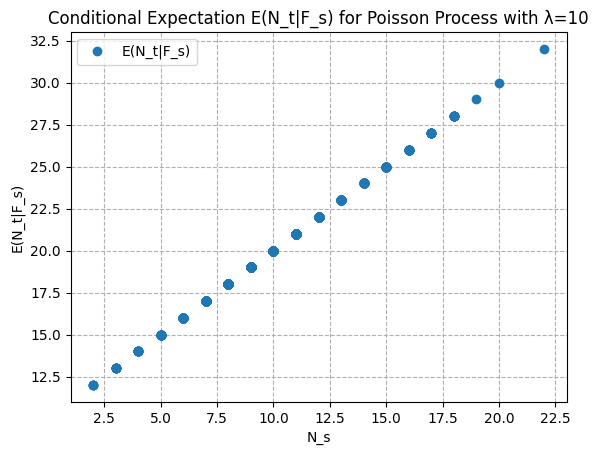

In [10]:
def simulate_poisson_process_to_t(lam: float, t: float, num_simulations: int) -> typing.List[np.ndarray]:
    """
    Simulate a Poisson process with intensity lambda up to time t.

    Parameters:
    lam (float): Intensity of the Poisson process.
    t (float): Upper limit of time.
    num_simulations (int): Number of simulations to run.

    Returns:
    list of np.ndarray: List of arrays representing the Poisson process for each simulation.

    Example:
    >>> processes = simulate_poisson_process_to_t(10, 2, 5)
    """
    return [np.random.poisson(lam * np.linspace(0, t, int(t * 100))) for _ in range(num_simulations)]

def plot_conditional_expectation_fs(lam: float, s: float, t: float, num_simulations: int):
    """
    Plot the conditional expectation E(N_t|F_s) for a Poisson process.

    Parameters:
    lam (float): Intensity of the Poisson process.
    s (float): Time s.
    t (float): Time t.
    num_simulations (int): Number of simulations to run.

    Example:
    >>> plot_conditional_expectation_fs(10, 1, 2, 5)
    """
    processes = simulate_poisson_process_to_t(lam, t, num_simulations)
    Ns_values = [process[int(s * 100)] for process in processes]
    Nt_estimates = [ns + lam * (t - s) for ns in Ns_values]

    plt.plot(Ns_values, Nt_estimates, 'o', label=f'E(N_t|F_s)')
    plt.xlabel('N_s')
    plt.ylabel(f'E(N_t|F_s)')
    plt.title(f'Conditional Expectation E(N_t|F_s) for Poisson Process with λ={lam}')
    plt.legend()
    plt.show()

# Example usage
lam = 10
s = 1
t = 2
num_simulations = 1000
plot_conditional_expectation_fs(lam, s, t, num_simulations)

#### Wnioski:

 1. Symulacja procesu Poissona do czasu $t$: Funkcja simulate_poisson_process_to_t symuluje proces Poissona o intensywności $λ$ do czasu $t$. Funkcja plot_conditional_expectation_fs oblicza warunkową wartość oczekiwaną $E(N_t|F_s)$ dla procesu Poissona.

2. Wykres warunkowej wartości oczekiwanej: Wykres przedstawia zależność między wartością procesu Poissona $N_s$ w chwili $s$ a warunkową wartością oczekiwaną $E(N_t|F_s)$ w chwili $t$. Zależność ta pokazuje, że wartość oczekiwana w chwili $t$ jest sumą wartości w chwili $s$ i oczekiwanej liczby zdarzeń w przedziale $(s, t]$, co wynosi $λ(t - s)$.

3. Potwierdzenie teorii: Wartości na wykresie zgadzają się z teoretycznymi oczekiwaniami, że $E(N_t|F_s) = N_s + λ(t - s)$, co potwierdza poprawność symulacji i estymacji. Symulacje wykazują zgodność z teoretycznymi wartościami, potwierdzając poprawność modelu procesu Poissona.
